<a href="https://colab.research.google.com/github/Domminique/Pytorch_audio_bird_species_identification/blob/main/03_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Computer Vision libraries

* `torchvision` - base domain library computer vision
* `torchvision.datasets` - get datasets and data loading functions for computer
* `torchvision.models` - get pretrained computer vision models that can leverage for your own
* `torchvision.transforms` - functions for munipulating your vision data (images) to be suitable for use with an ML model
* `torch.utils.data.dataet` - Base dataset class for PyTorch
* `torch.utils.data.DataLoader` - Creates a Python iterable over a dataset

In [ ]:
#  Import PyTorch 
import torch
from torch import nn


# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions

print(torch.__version__)
print(torchvision.__version__)


1.13.0+cu116
0.14.0+cu116


from torchvision.datasets.mnist import FashionMNIST
## 1. Getting dataset

the dataset will be using is FashionMNIST from torchvision.datasets



In [ ]:
# setup training data
train_data = datasets.FashionMNIST(
    root="data", # Where to download data to?
    train=True,   # do we want the traininig dataset?
    download=True, # do we want to download yes/no?
    transform=torchvision.transforms.ToTensor(), # how do we want to transform the data
    target_transform=None # how do we want to transform the lables/targets
)

test_data = datasets.FashionMNIST(
    root="data", # Where to download data to?
    train=False,   # do we want the traininig dataset?
    download=True, # do we want to download yes/no?
    transform=ToTensor(), # how do we want to transform the data
    target_transform=None # how do we want to transform the lables/targets
)

In [ ]:
len(train_data), len(test_data)

(60000, 10000)

In [ ]:
# See the first training example
image, label  = train_data[0]
image, label


(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
train_data.targets


tensor([9, 0, 0,  ..., 3, 0, 5])

In [ ]:
# Check the shape of our model

print(f"Image shape: {image.shape} -> [color_channels, height, width]")
print(f"Image label: {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image label: Ankle boot


### 1.2 Visualizing our data

Image shape: torch.Size([1, 28, 28])


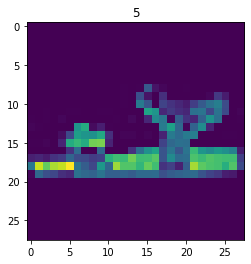

In [ ]:
image, label = train_data[59999]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label);

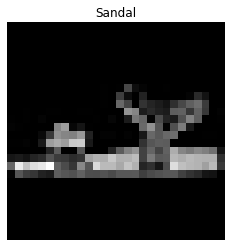

In [ ]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label]);
plt.axis(False);

37542
46067
46876
46414
10026
27335
38620
11924
14950
57113
31378
29014
47210
18954
18231
47572


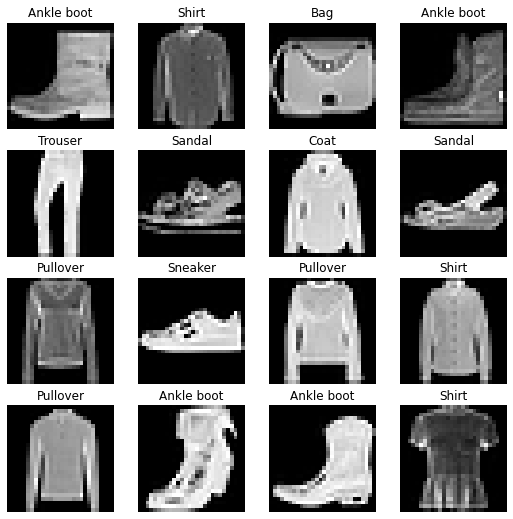

In [ ]:
# Plot more images 
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  print(random_idx)
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

Do you think these items of clothing(images) could be modelled with pure linear lines? or do you think we'll need non-linearities

## 2. Prepare DataLoader

Rigt now, our data is in the form of PyTorch Datasets.

DataLoader turns our dataset into a Python iterable 

More specifically, we want to turn our data into batches ( or mini-batches).

Why would we do this ?

1. It is more computationally efficient, as in, your computing hardware may not be able to look (store in memory) at 60K images in one hit. So we break it down to 32 images at a time (batch size 32).
2. It give our neural network more chances to update its gradients per epoch.

In [ ]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter

BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)
test_dataloader = DataLoader(dataset=test_data,
                              batch_size=BATCH_SIZE,
                              shuffle=False)

train_dataloader, test_dataloader


(<torch.utils.data.dataloader.DataLoader at 0x7f88e435a220>,
 <torch.utils.data.dataloader.DataLoader at 0x7f88e435a280>)

In [ ]:
# Let us check what out what we have created
print(f"DataLoaders :{train_dataloader, test_dataloader}")
print(f"Length of train_dataLoaders :{len(train_dataloader)} batches of {BATCH_SIZE}...")
print(f"Length of test_dataLoaders :{len(test_dataloader)} batches of {BATCH_SIZE}...")
  

DataLoaders :(<torch.utils.data.dataloader.DataLoader object at 0x7f88e435a220>, <torch.utils.data.dataloader.DataLoader object at 0x7f88e435a280>)
Length of train_dataLoaders :1875 batches of 32...
Length of test_dataLoaders :313 batches of 32...


In [ ]:
# Check out what is inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size : torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


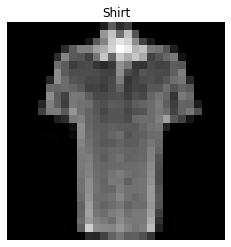

In [ ]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size : {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## 3. Model 0: Build a baseline model
When starting to build a series of machine learning modelling experiments , it is best practie to start with a baseline model

A baseline model is a simple model you will try and improve with subsequent models/experiments

In other words: start simply and add complexity when necessary




In [ ]:
# create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x) # perform forward pass

# Print out what ahppen

print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"shape after flattening: {output.shape} -> [color_channels, height * width] ")

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
shape after flattening: torch.Size([1, 784]) -> [color_channels, height * width] 


In [ ]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self, 
               input_shape:int,
               hidden_units:int,
               output_shape:int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,out_features=hidden_units),
        nn.Linear(in_features=hidden_units,out_features=output_shape)

        )
  def forward(self,x):
    return self.layer_stack(x)  


In [ ]:
torch.manual_seed(42)

# setup model with input parameters

model_0 = FashionMNISTModelV0(
    input_shape = 784, # this is 28 * 28
    hidden_units=10, # how many units in the hideen layer
    output_shape=len(class_names) # one for every class
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [ ]:
# model_0.state_dict()

### 3.1 Setup loss, optimizer and evaluation metrics
* Loss function - since we rae working with mult-class data, our loss function will be `nn.CrossEntropyLoss()`
* Optimizer - our optimizer `torch.optim.SDG()` (stochastic gradient descent)
* Evaluation metric - since we are working on a classification problem let us use accuracy our evaluation metric


In [ ]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download .....")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/Domminique/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)




helper_functions.py already exists, skipping download .....


In [ ]:
# Import accuracy metric

from  helper_functions import accuracy_fn

# set up loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), 
                            lr=0.1)

In [ ]:
accuracy_fn

<function helper_functions.accuracy_fn(y_true, y_pred)>

### 3.2 Creating a function to time our experiments
Machine learning is very experimental.

Two of the main thins you will want to track are:

1. Models perfomance (loss and accuracy values etc)
2. How fast it runs 

In [ ]:
from timeit import default_timer as timer
def print_train_time(start:float,
                     end:float,
                     device:torch.device = None):
  
    
  """Prints difference start and end time."""
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds") 
  return total_time



In [ ]:
start_time = timer()

# some code...
end_time = timer()
print_train_time(start=start_time, end=end_time, device="cpu")

Train time on cpu: 0.000 seconds


4.46619997092057e-05

### 3.3 Creating

 a training loop and training a model on batches of data         

1. Loop through epochs.
2. Loop through training batches, perfom training steps, calculate the train loss batch.
3. Loop through testing batches, perfom testin steps, calculate the test loss per batch
4. Print out what is happening

In [ ]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (we'll keep this small for faster training times)
epochs = 3

# Create training and testing loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    ### Training
    train_loss = 0
    # Add a loop to loop through training batches
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train() 
        # 1. Forward pass
        y_pred = model_0(X)

        # 2. Calculate loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulatively add up the loss per epoch 

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Print out how many samples have been seen
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

    # Divide total traing loss by length of train dataloader (average loss per batch per epoch)
    train_loss /= len(train_dataloader)
    
    ### Testing
    # Setup variables for accumulatively adding up loss and accuracy 
    test_loss, test_acc = 0, 0 
    model_0.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            # 1. Forward pass
            test_pred = model_0(X)
           
            # 2. Calculate loss (accumatively)
            test_loss += loss_fn(test_pred, y) # accumulatively add up the loss per epoch

            # 3. Calculate accuracy (preds need to be same as y_true)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))
        
        # Calculations on test metrics need to happen inside torch.inference_mode()
        # Divide total test loss by length of test dataloader (per batch)
        test_loss /= len(test_dataloader)

        # Divide total accuracy by length of test dataloader (per batch)
        test_acc /= len(test_dataloader)

    ## Print out what's happening
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

# Calculate training time      
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu, 
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.59039 | Test loss: 0.50954, Test acc: 82.04%

Epoch: 1
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.47633 | Test loss: 0.47989, Test acc: 83.20%

Epoch: 2
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.45503 | Test loss: 0.47664, Test acc: 83.43%

Train time on cpu: 27.971 seconds


In [ ]:
next(model_0.parameters()).device

device(type='cpu')

## 4. Make predictions and get Model 0 results

In [ ]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module, 
               data_loader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               accuracy_fn):
    """Returns a dictionary containing the results of model predicting on data_loader.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            # Make predictions with the model
            y_pred = model(X)
            
            # Accumulate the loss and accuracy values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, 
                                y_pred=y_pred.argmax(dim=1)) # For accuracy, need the prediction labels (logits -> pred_prob -> pred_labels)
        
        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)
        
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn
)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## Setup device agnostic code (for using a GPU if there is one)

In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
torch.cuda.is_available()

False

In [ ]:
# set up device agnostic code

import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device


'cpu'

## 6.1 Model 1: build a better model with non-linearity 

We learned about non-linearity in module 2 

In [ ]:
#Create a model with non-linear and linear layers

class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int):
     super().__init__()
     self.layer_stack = nn.Sequential(
         nn.Flatten(), # Flatten inputs into a single vector
         nn.Linear(in_features=input_shape,
                   out_features=hidden_units),
         nn.ReLU(),
         nn.Linear(in_features=hidden_units,
                   out_features=output_shape),   
         nn.ReLU()                 
     ) 

  def forward(self, x: torch.Tensor):
    return self.layer_stack(x)   

In [ ]:
# Create an instance of model_1

torch.manual_seed(42)

model_1 = FashionMNISTModelV1(input_shape=784, # This is the outpuit of the flatten layer 28*28
                              hidden_units = 10, 
                              output_shape=len(class_names)).to(device) # send to GPU if available


next(model_1.parameters()).device                              



device(type='cpu')

## 6.1 Set up loss fuction and optimizer and evaluaton metrics

In [ ]:
def train_step(model:torch.nn.Module, 
                data_loader:torch.utils.data.DataLoader,
                loss_fn:torch.nn.Module,
                optimizer:torch.optim.Optimizer,
                accuracy_fn,
                device: torch.device = device):
   
  """ Perfoms a training with model trying to learn on data_loader"""
  train_loss, train_acc = 0, 0 

  # put model into traimimng mode

  model.train()

  # Add a loop to loop through training batches
  for batch, (X, y) in enumerate(data_loader):
    # Put data on target device 
      X, y = X.to(device), y.to(device)

       
      # 1. Forward pass (outputs raw logits from yhe model)
      y_pred = model(X)

      # 2. Calculate loss and accuracy (per batch)
      loss = loss_fn(y_pred, y)
      train_loss += loss # accumulatively add up the loss per epoch 
      train_acc += accuracy_fn(y_true=y,
                               y_pred=y_pred.argmax(dim=1)) # go from logits -> prediction labels
      # 3. Optimizer zero grad
      optimizer.zero_grad()

      # 4. Loss backward
      loss.backward()

      # 5. Optimizer step
      optimizer.step()

     
  # Divide total traing loss and accuracy by length of train dataloader (average loss per batch per epoch)
  train_loss /= len(data_loader) 
  train_acc /= len(data_loader) 
  print(f"Train loss: {train_loss:.5f}| Train acc: { train_acc:.2f}%")

In [ ]:
def test_step(model: torch.nn.Module,
              data_loader : torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device:torch.device = device):
  """Perfoms a testing loop step on model going over the dataloader """
  test_loss, test_acc = 0, 0

  # put the model in the eval mode

  model.eval()

  # Turn on inference mode context device 
  with torch.inference_mode():
    for X, y in data_loader:
      # send the data to the target  device 
      X, y = X.to(device), y.to(device)


      # 1. Forward pass (outputs raw logits)
      test_pred = model(X)

      # 2. Calculate the loss/acc
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true=y,
                              y_pred=test_pred.argmax(dim=1)) # go from Logits -> prediction labels

    # Adjust metrics and print out

    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test loss:{test_loss:.5f} | Test acc: {test_acc:.2f}%\n")



In [ ]:
torch.manual_seed(42)

#Measure time

from timeit import default_timer as timer
train_time_start_on_gpu = timer()

# set epochs
epoch = 3

# Create a optimization and evaluation loopusing train_step( and test_step)
for epoch in tqdm(range(epochs)):
  print(f"Epoch : {epoch}\n...........")
  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  
  test_step(model=model_1,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)
  
  train_time_end_on_gpu = timer()

  total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                              end=train_time_start_on_gpu,
                                              device=device)
  

  



  0%|          | 0/3 [00:00<?, ?it/s]

Epoch : 0
...........
Train loss: 2.30166| Train acc: 11.31%
Test loss:2.30211 | Test acc: 10.75%

Train time on cpu: 0.000 seconds
Epoch : 1
...........
Train loss: 2.30166| Train acc: 11.31%
Test loss:2.30211 | Test acc: 10.75%

Train time on cpu: 0.000 seconds
Epoch : 2
...........
Train loss: 2.30166| Train acc: 11.31%
Test loss:2.30211 | Test acc: 10.75%

Train time on cpu: 0.000 seconds


** Note ** Sometimes, depending on your data/hardware you might find that your model trains faster on CPU than GPU

Why is this?
1. It could be that the over haed for copying data/model to find from the GPU outweight the compute benefits offered by the GPU.
2. The hardware you are using has btter CPU in terms compute capability than the GPU


In [ ]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [ ]:
total_train_time_model_0

27.970970293999926

In [ ]:
# get model_1 results dictionary

model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)

model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 2.3021068572998047,
 'model_acc': 10.75279552715655}

## Model 2 : Building a Convolutional Neural Network (CNN)
CNN's are also called ConvNets

CNN's are known for their capabilities to find patterns in Visual data

To find out what is happening inside CNN, see this website https://poloclub.github.io/cnn-explainer/

In [ ]:
from torch.nn.modules.pooling import MaxPool2d
# Create a CNN 

class FashionMNISTModelV2(nn.Module):
  """
  Model architecture that replicates the TinyVGG 
  model from explainer website
  """
  def __init__(self, input_shape: int, hidden_units:int, output_shape:int):
     super().__init__()
     self.conv_block_1 = nn.Sequential(
         nn.Conv2d(in_channels=input_shape,
                   out_channels=hidden_units,
                   kernel_size=3, # smaller kernel extracts more features = deep architecture
                   stride=1, # decreased stride = more features learnt
                   padding=1), # zero padding is better, Values we can set ourselves ion our NN's are called hyperparameters
                   
         nn.ReLU(),
         nn.Conv2d(in_channels=hidden_units,
                   out_channels=hidden_units,
                   kernel_size=3,
                   stride=1,
                   padding=1),

         nn.ReLU(),
         nn.MaxPool2d(kernel_size=2)          

     )
     self.conv_block_2 = nn.Sequential(
         nn.Conv2d(in_channels=hidden_units,
                   out_channels=hidden_units,
                   kernel_size=3,
                   stride=1,
                   padding=1), # Values we can set ourselves ion our NN's are called hyperparameters
                   
         nn.ReLU(),
         nn.Conv2d(in_channels=hidden_units,
                   out_channels=hidden_units,
                   kernel_size=3,
                   stride=1,
                   padding=1),

         nn.ReLU(),
         nn.MaxPool2d(kernel_size=2) # Ting VGG uses max-pooling with  2 * 2 kernel and stride of 2 , dicards 75% of activations hence more computational efficient and avoid over fitting         

     )
     self.classifier = nn.Sequential(
         nn.Flatten(),
         nn.Linear(in_features=hidden_units*7*7, # There is a trick to calculating this ....
                   out_features=output_shape)
     )
  def forward(self, x):
    x = self.conv_block_1(x)
    #print(f"Output shape of conv_block_1: {x.shape}")
    x = self.conv_block_2(x)
    #print(f"Output shape of conv_block_2: {x.shape}")
    x = self.classifier(x)
    #print(f"Output shape of classifier: {x.shape}")
    return x





In [ ]:
image.shape

torch.Size([1, 28, 28])

In [ ]:
len(class_names)

10

In [ ]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1, 
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)
                              

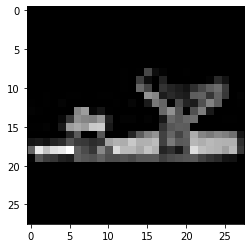

In [ ]:
plt.imshow(image.squeeze(), cmap="gray")

In [ ]:
model_2(image.unsqueeze(0).to(device))

tensor([[ 0.0289, -0.0566,  0.0513, -0.0255, -0.0178,  0.0152, -0.0027, -0.0040,
          0.0248,  0.0148]], grad_fn=<AddmmBackward0>)

### 7.1 Stepping through `nn.conv2d()`
Read the docs for `nn.conv2d()`


In [ ]:
torch.manual_seed(42)


# create a batch of images
images = torch.randn(size=(32, 3, 64, 64))
test_image = images[0]

print(f"Image batch shape: {images.shape}")
print(f"Single image shape : {test_image.shape}")
print(f"Test image:\n {test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape : torch.Size([3, 64, 64])
Test image:
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-

In [ ]:
test_image.shape

torch.Size([3, 64, 64])

In [ ]:
torch.manual_seed(42)
# Create a single conv2d layer

conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=(3,3),
                       stride=1,
                       padding=1)

# Pass the data through the convolutional layer
conv_output = conv_layer(test_image)
conv_output
conv_output.shape

torch.Size([10, 64, 64])

### 7.2 Stepping through `nn.Maxpool2d()`

In [ ]:
print(f"Test image original shape: {test_image.shape}")
# create a smaple nn.Maxpool2d layer 

max_pool_layer = nn.MaxPool2d(kernel_size=2)


# pass data through the conv_layer 
test_image_through_conv = conv_layer(test_image)
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

# Pass data through the max  pool layer 

test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and max_pool-layer(): {test_image_through_conv_and_max_pool.shape}")


Test image original shape: torch.Size([3, 64, 64])
Shape after going through conv_layer(): torch.Size([10, 64, 64])
Shape after going through conv_layer() and max_pool-layer(): torch.Size([10, 32, 32])


In [ ]:
torch.manual_seed(42)

# Create a random tensor with a similar number of dimensions  to our images 
random_tensor = torch.randn(size=(1,1,2,2))
print(f"\nRandom tensor:\n {random_tensor}")
print(f"\nRandom tensor shape:\n {random_tensor.shape}")

# create a max pool layer 
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass the random tensor through the max pool layer 

max_pool_tensor = max_pool_layer(random_tensor)

print(f"\nMax pool tensor:\n {max_pool_tensor}")
print(f"\nMax pool shape:\n {max_pool_tensor.shape}")






Random tensor:
 tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])

Random tensor shape:
 torch.Size([1, 1, 2, 2])

Max pool tensor:
 tensor([[[[0.3367]]]])

Max pool shape:
 torch.Size([1, 1, 1, 1])


### 7.3 Setup a loss fuction and optimizer for `model_2`

In [ ]:
# setup loss function/eval metrics/optimizer

from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

#model_2.state_dict()

### 7.4 Training and Testing `model_2` using our training and test functions

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)


#Measure time
from timeit import  default_timer as timer
train_time_start_model_2 = timer()


epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n---------")
  train_step(model=model_2,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device),

  test_step(model=model_2,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device) 
train_time_end_model_2 = timer()  
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                            end=train_time_end_model_2,
                                            device=device)
          


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.59518| Train acc: 78.38%
Test loss:0.39500 | Test acc: 85.99%

Epoch: 1
---------
Train loss: 0.36536| Train acc: 86.90%
Test loss:0.35244 | Test acc: 86.91%

Epoch: 2
---------
Train loss: 0.32588| Train acc: 88.13%
Test loss:0.32719 | Test acc: 88.07%

Train time on cpu: 168.851 seconds


In [ ]:
# Get model_2 results 
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    
)

model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}

## 8.1 Compare model results and training time



In [ ]:
import pandas as pd

compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])

compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,2.302107,10.752796
2,FashionMNISTModelV2,0.327190,88.069089


In [ ]:
# Add training time to results comparison
compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]

compare_results                                    


,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,27.970970
1,FashionMNISTModelV1,2.302107,10.752796,0.000000
2,FashionMNISTModelV2,0.327190,88.069089,168.850968


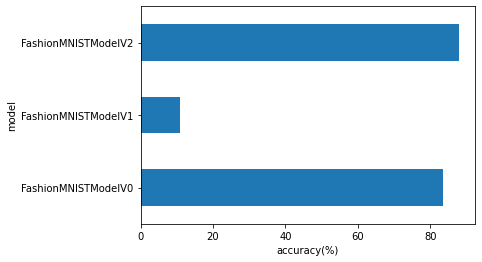

In [ ]:
# Visualise our model results

compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy(%)")
plt.ylabel("model");



## 9. Make and evaluate random predictions with the best model 


In [ ]:
def make_predictions(model:torch.nn.Module,
                     data:list,
                     device:torch.device = device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Prepare the sample (add a batch dimension and pass to target device)
      sample = torch.unsqueeze(sample, dim=0).to(device)


      # Forward pass (model outputs raw logits)
      pred_logit = model(sample)

      # get predictions probability (Logits _> predictions probability)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      # Get pred_prob off the GPU for further calculations
      pred_probs.append(pred_prob.cpu())
  # Stack the pred_probs to turn list into a tensor
  return torch.stack(pred_probs)








In [ ]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

# View the  first sample shape 
test_samples[0].shape




torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Sandal')

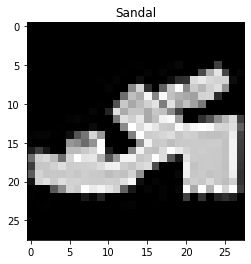

In [ ]:
plt.imshow(test_samples[0].squeeze(),cmap="gray")
plt.title(class_names[test_labels[0]])

In [ ]:
# Make predictions
pred_probs = make_predictions(model=model_2,
                              data=test_samples)

# View first two probabilities
pred_probs[:2]

tensor([[1.4021e-06, 1.7343e-07, 4.4511e-07, 1.2103e-05, 5.4026e-07, 9.9938e-01,
         3.7154e-06, 2.1650e-04, 1.4199e-04, 2.4416e-04],
        [1.0080e-01, 5.6287e-01, 7.4506e-04, 1.1212e-01, 6.3881e-02, 3.0674e-04,
         1.5560e-01, 1.6463e-03, 1.0169e-03, 1.0133e-03]])

In [ ]:
# Convert predictions probabilities to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

In [ ]:
test_labels

[5, 1, 7, 4, 3, 0, 4, 7, 1]

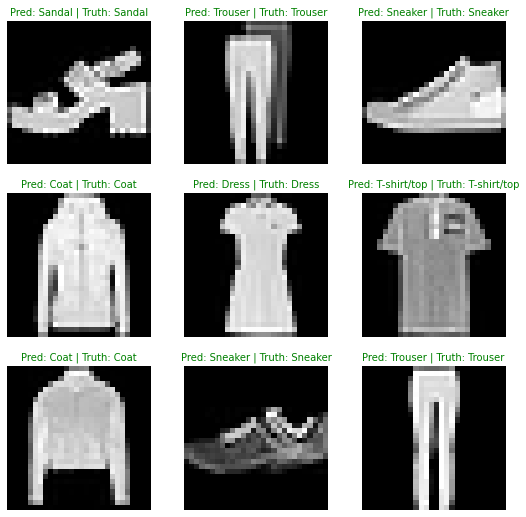

In [ ]:
# Plot predictions
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  #create subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the preditcion (in text form, e.g "scandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form)
  truth_label = class_names[pred_classes[i]]

  # Create a title for the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for quality between pred and truth and change color of title text
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10,c="g") # Green text if prediction same as truth
  else:
    plt.title(title_text, fontsize=10, c="r")  

  plt.axis(False);  




## 10. Making a confusion matrix for further prediction evaluation

A confusion matrix is a fantastic way of evaluating your classification models visually

1. Make predictions with our traditional model on the test dataset
2. Make a confusion matrix `torchmetrics.ConfusionMatrix`
3. Plot the confusiom matrix using `mlxtend.plotting.plot_confusion_matrix()`


In [ ]:
# Import tqdm.auto
from tqdm.auto import tqdm

# 1. make predictions with trained model

y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions..."):
    # send the dtata and targets to target device
    X, y = X.to(device), y.to(device)

    # Do the forward pass
    y_logit = model_2(X)

    # Turn predictions from logits -> predictions probabilities -> predictions labels
    y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)

    # Put predictions on CPU for evaluation
    y_preds.append(y_pred.cpu())

# concatenate list of predictions into a tensor
#print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]






Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
# See if required packages are installed and if not install them ...
try:
  import torchmetrics, mlxtend
  print(f"mixtend version: {mlxtend.__version__}")
  assert int(mlxtend.__version.__.split(".")(1)>= 19, "mlextend version should be 0.19.0 or higher")
except:
  !pip install torchmetrics -U mlxtend 
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}") 

mixtend version: 0.21.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mlxtend version: 0.21.0


In [ ]:
import mlxtend
print(mlxtend.__version__)

0.21.0


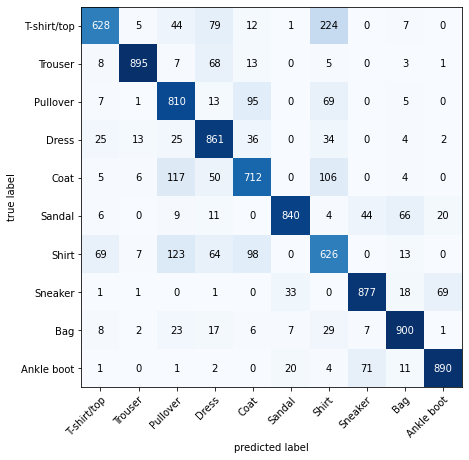

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. setup confusion instance and compare predictions to targets 
confmat = ConfusionMatrix(task="multiclass", num_classes=len(class_names))
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)
# 3. Plot the confusion matric
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), #matplotlib likes working with numpy
    class_names=class_names,
    figsize=(10,7)
    
)


## 11. Save and load best perfoming label



In [ ]:
from pathlib import Path

# Create model directory path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                exist_ok=True)

# Create model save
MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

# Save the model state dict
print(f"Saving model to:{MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),f=MODEL_SAVE_PATH)


Saving model to:models/03_pytorch_computer_vision_model_2.pth


In [ ]:
# Create a new instance
torch.manual_seed(42)

loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                     hidden_units=10,
                                     output_shape=len(class_names))

# Load in the save state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send the model to the target device 
loaded_model_2.to(device)


FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}

In [ ]:
# Evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

loaded_model_2_results


  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}

In [ ]:
# Check if model results are close to each other 
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol=1e-02)

tensor(True)

# Exercises